In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
PATH = "VTBR_200201_201219.csv"
df = pd.read_csv(PATH)
df['<DATE>'] = pd.to_datetime(df['<DATE>'])
df['date_delta'] = (df['<DATE>'] - df['<DATE>'].min()) / np.timedelta64(1, "D")

In [3]:
df

<DATE>    <OPEN>    <HIGH>     <LOW>   <CLOSE>        <VOL>  \
0   2020-02-03  0.046060  0.046565  0.045835  0.046150  28744030000   
1   2020-02-04  0.046370  0.047435  0.046330  0.047255  38499030000   
2   2020-02-05  0.047330  0.048175  0.047025  0.047680  39508130000   
3   2020-02-06  0.048000  0.048350  0.047710  0.048075  30385790000   
4   2020-02-07  0.048040  0.048230  0.047400  0.048090  17492800000   
..         ...       ...       ...       ...       ...          ...   
217 2020-12-14  0.038150  0.038695  0.037500  0.037830  63760160000   
218 2020-12-15  0.037710  0.038040  0.037610  0.037765  39265700000   
219 2020-12-16  0.037820  0.038500  0.037700  0.038315  64465980000   
220 2020-12-17  0.038350  0.038940  0.038005  0.038350  48285610000   
221 2020-12-18  0.038195  0.038365  0.037825  0.038150  29649110000   

     date_delta  
0           0.0  
1           1.0  
2           2.0  
3           3.0  
4           4.0  
..          ...  
217       315.0  
218       316.0  
219       317.0  
220       318.0  
221       319.0  

[222 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   <DATE>      222 non-null    datetime64[ns]
 1   <OPEN>      222 non-null    float64       
 2   <HIGH>      222 non-null    float64       
 3   <LOW>       222 non-null    float64       
 4   <CLOSE>     222 non-null    float64       
 5   <VOL>       222 non-null    int64         
 6   date_delta  222 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.3 KB


In [5]:
def draw(X, y):
    X = np.array(X)
    plt.figure(figsize=(10, 5))
    plt.plot(y, X)
    plt.ylabel("Price")
    plt.xlabel('Date')
    plt.show()

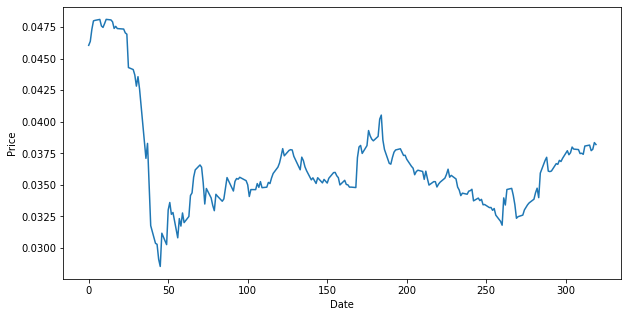

In [6]:
draw(df['<OPEN>'], df['date_delta'])

In [7]:
window_of_size = window_size = 20

In [8]:
train = df.loc[20:, :]
test = df.loc[window_size+window_of_size+1:, :]

In [9]:
train.head()

<DATE>    <OPEN>   <HIGH>     <LOW>   <CLOSE>         <VOL>  date_delta
20 2020-03-03  0.043710  0.04419  0.042835  0.043255   50685620000        29.0
21 2020-03-04  0.042825  0.04380  0.042700  0.043155   28688450000        30.0
22 2020-03-05  0.043575  0.04378  0.042925  0.043070   25375410000        31.0
23 2020-03-06  0.042585  0.04260  0.040835  0.041220   62444220000        32.0
24 2020-03-10  0.037100  0.03970  0.034780  0.037450  100095230000        36.0

In [10]:
test.head()

<DATE>    <OPEN>    <HIGH>     <LOW>   <CLOSE>         <VOL>  \
41 2020-04-02  0.032770  0.032995  0.031175  0.032175   83184070000   
42 2020-04-03  0.032005  0.032600  0.031825  0.032080   69309390000   
43 2020-04-06  0.032490  0.033860  0.032370  0.033670   84868050000   
44 2020-04-07  0.034150  0.035200  0.034025  0.034370  129032250000   
45 2020-04-08  0.034365  0.035000  0.033920  0.035000   62722120000   

    date_delta  
41        59.0  
42        60.0  
43        63.0  
44        64.0  
45        65.0

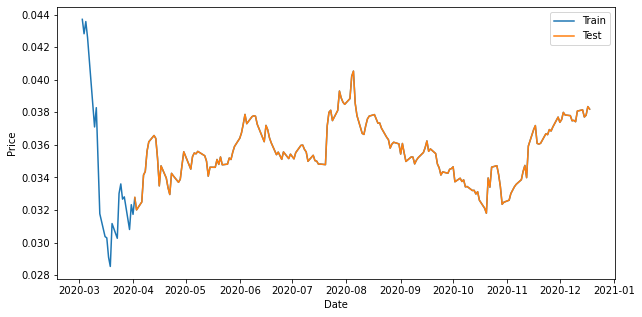

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(train['<DATE>'], train['<OPEN>'], label="Train")
plt.plot(test['<DATE>'], test['<OPEN>'], label="Test")
plt.ylabel("Price")
plt.xlabel('Date')
plt.legend(loc="best")
plt.show()

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import machin
model = machin.NetRegressor(n_input=window_size)


In [13]:
y_hat = train.copy()

In [14]:
for i in range(window_of_size):
    if i == 0:
        n_input = train[i:i+window_size]['<OPEN>'].values
    else:
        n_input = np.vstack((n_input, train[i:i+window_size]['<OPEN>'].values))

In [15]:
n_input

array([[0.04371 , 0.042825, 0.043575, 0.042585, 0.0371  , 0.038285,
        0.034995, 0.031765, 0.030365, 0.030285, 0.0291  , 0.02853 ,
        0.031165, 0.03026 , 0.03301 , 0.0336  , 0.032665, 0.032805,
        0.0308  , 0.032325],
       [0.042825, 0.043575, 0.042585, 0.0371  , 0.038285, 0.034995,
        0.031765, 0.030365, 0.030285, 0.0291  , 0.02853 , 0.031165,
        0.03026 , 0.03301 , 0.0336  , 0.032665, 0.032805, 0.0308  ,
        0.032325, 0.03173 ],
       [0.043575, 0.042585, 0.0371  , 0.038285, 0.034995, 0.031765,
        0.030365, 0.030285, 0.0291  , 0.02853 , 0.031165, 0.03026 ,
        0.03301 , 0.0336  , 0.032665, 0.032805, 0.0308  , 0.032325,
        0.03173 , 0.03277 ],
       [0.042585, 0.0371  , 0.038285, 0.034995, 0.031765, 0.030365,
        0.030285, 0.0291  , 0.02853 , 0.031165, 0.03026 , 0.03301 ,
        0.0336  , 0.032665, 0.032805, 0.0308  , 0.032325, 0.03173 ,
        0.03277 , 0.032005],
       [0.0371  , 0.038285, 0.034995, 0.031765, 0.030365, 0.030285,


In [16]:
n_output = train['<OPEN>'][window_size:window_size+window_of_size].values.reshape(-1, 1)

In [17]:
n_output.T

array([[0.03173 , 0.03277 , 0.032005, 0.03249 , 0.03415 , 0.034365,
        0.035605, 0.036185, 0.036575, 0.036395, 0.03518 , 0.03348 ,
        0.03471 , 0.033965, 0.03337 , 0.03295 , 0.03425 , 0.0341  ,
        0.0337  , 0.033885]])

In [18]:
model.fit(n_input, n_output)

In [19]:
new_base = train[20+window_of_size:20+window_of_size+window_size]['<OPEN>'].values

In [20]:
new_base

array([0.03476 , 0.035575, 0.03451 , 0.035275, 0.0355  , 0.03545 ,
       0.0356  , 0.03533 , 0.035   , 0.034075, 0.034625, 0.03462 ,
       0.0351  , 0.0348  , 0.035255, 0.034775, 0.034815, 0.03519 ,
       0.0351  , 0.03555 ])

In [21]:
model.predict(new_base)[0]

0.03376829

In [22]:
train['<OPEN>'][20+i+window_size]

0.033885000000000005

In [23]:
z_hat = train.copy()

In [24]:
reports = []
for i in range(20, len(train) - window_size - window_of_size):
    for j in range(i, i+window_of_size):
        if j == i:
            n_input = train[j:j+window_size]['<OPEN>'].values
        else:
            n_input = np.vstack((n_input, train[j:j+window_size]['<OPEN>'].values))
    n_output = train['<OPEN>'][i+window_of_size:i+window_of_size+window_of_size].values.reshape(-1, 1)
    model.fit(n_input, n_output)
    new_base = train[i+window_of_size:i+window_of_size+window_size]['<OPEN>'].values
    y_hat.loc[i+window_of_size+window_size, '<OPEN>'] = model.predict(new_base)[0]
    report = abs((y_hat['<OPEN>'][i+window_of_size+window_size] -  train['<OPEN>'][i+window_of_size+window_size])/train['<OPEN>'][i+window_of_size+window_size])*100
    reports.append(report)
    if report < 30:
        z_hat.loc[i+window_of_size+window_size, '<OPEN>'] = np.NaN
    else:
        print(report)
reports = np.array(reports)

37.24952167185851


In [25]:
for i in range(20, 20+window_size+window_of_size):
    z_hat.loc[i, '<OPEN>'] = np.NaN

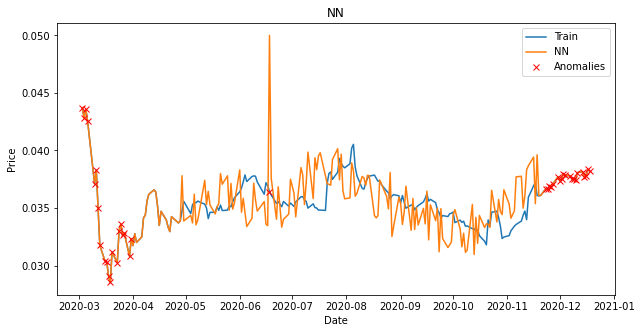

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(train['<DATE>'], train['<OPEN>'], label="Train")
plt.plot(y_hat['<DATE>'], y_hat['<OPEN>'], label="NN")
#plt.plot(z_hat['<DATE>'], z_hat['<OPEN>'], 'rx', label="Anomalies")
plt.ylabel("Price")
plt.xlabel('Date')
plt.legend(loc="best")
plt.title("NN")
plt.show()

In [27]:
z_hat[z_hat['<OPEN>'] > 0]

<DATE>    <OPEN>    <HIGH>     <LOW>   <CLOSE>         <VOL>  \
20  2020-03-03  0.043710  0.044190  0.042835  0.043255   50685620000   
21  2020-03-04  0.042825  0.043800  0.042700  0.043155   28688450000   
22  2020-03-05  0.043575  0.043780  0.042925  0.043070   25375410000   
23  2020-03-06  0.042585  0.042600  0.040835  0.041220   62444220000   
24  2020-03-10  0.037100  0.039700  0.034780  0.037450  100095230000   
25  2020-03-11  0.038285  0.038285  0.036170  0.036355   58704400000   
26  2020-03-12  0.034995  0.034995  0.030735  0.031120  146656520000   
27  2020-03-13  0.031765  0.032995  0.031200  0.031575  130719530000   
28  2020-03-16  0.030365  0.030945  0.028755  0.030150  118314310000   
29  2020-03-17  0.030285  0.031440  0.028905  0.029735   90493350000   
30  2020-03-18  0.029100  0.029390  0.027600  0.028140   90350300000   
31  2020-03-19  0.028530  0.030650  0.027855  0.030570  101096200000   
32  2020-03-20  0.031165  0.033025  0.031090  0.031500  117246270000   
33  2020-03-23  0.030260  0.032475  0.030105  0.031600   79736050000   
34  2020-03-24  0.033010  0.033495  0.032400  0.032880   62990120000   
35  2020-03-25  0.033600  0.035485  0.031700  0.032800  131779890000   
36  2020-03-26  0.032665  0.033400  0.032100  0.032500   64621230000   
37  2020-03-27  0.032805  0.032935  0.030855  0.031100   60507180000   
38  2020-03-30  0.030800  0.031795  0.029820  0.031650   77921780000   
39  2020-03-31  0.032325  0.032695  0.031795  0.032600   71869010000   
93  2020-06-18  0.036430  0.036495  0.035830  0.035900   32640430000   
202 2020-11-23  0.036680  0.037000  0.036255  0.036530   31711890000   
203 2020-11-24  0.036625  0.036995  0.036435  0.036935   31542090000   
204 2020-11-25  0.036940  0.037150  0.036445  0.036820   51512280000   
205 2020-11-26  0.036850  0.037440  0.036600  0.037000   71416540000   
206 2020-11-27  0.037100  0.038200  0.036785  0.037765  110544580000   
207 2020-11-30  0.037705  0.037850  0.037005  0.037210   44417880000   
208 2020-12-01  0.037385  0.037825  0.037270  0.037700   29852440000   
209 2020-12-02  0.037550  0.038050  0.037470  0.037970   33236820000   
210 2020-12-03  0.037995  0.038430  0.037340  0.037755   46388570000   
211 2020-12-04  0.037835  0.038100  0.037700  0.037835   39926930000   
212 2020-12-07  0.037795  0.037985  0.037445  0.037490   25896520000   
213 2020-12-08  0.037480  0.037800  0.037050  0.037480   26196850000   
214 2020-12-09  0.037505  0.037940  0.037250  0.037320   31227560000   
215 2020-12-10  0.037420  0.038140  0.037230  0.038030   47833580000   
216 2020-12-11  0.038075  0.038230  0.037700  0.037945   35719410000   
217 2020-12-14  0.038150  0.038695  0.037500  0.037830   63760160000   
218 2020-12-15  0.037710  0.038040  0.037610  0.037765   39265700000   
219 2020-12-16  0.037820  0.038500  0.037700  0.038315   64465980000   
220 2020-12-17  0.038350  0.038940  0.038005  0.038350   48285610000   
221 2020-12-18  0.038195  0.038365  0.037825  0.038150   29649110000   

     date_delta  
20         29.0  
21         30.0  
22         31.0  
23         32.0  
24         36.0  
25         37.0  
26         38.0  
27         39.0  
28         42.0  
29         43.0  
30         44.0  
31         45.0  
32         46.0  
33         49.0  
34         50.0  
35         51.0  
36         52.0  
37         53.0  
38         56.0  
39         57.0  
93        136.0  
202       294.0  
203       295.0  
204       296.0  
205       297.0  
206       298.0  
207       301.0  
208       302.0  
209       303.0  
210       304.0  
211       305.0  
212       308.0  
213       309.0  
214       310.0  
215       311.0  
216       312.0  
217       315.0  
218       316.0  
219       317.0  
220       318.0  
221       319.0

In [28]:
len(df) - window_size - window_of_size

182

In [29]:
reports.mean()

5.168823940321322

In [30]:
z_hat = test.copy()
y_hat = test.copy()

In [31]:
len(test) - window_size - window_of_size

141

In [32]:
reports = []
for i in range(test.index.start, test.index.stop - window_size - window_of_size):
    new_base = test[i+window_of_size:i+window_of_size+window_size]['<OPEN>'].values
    y_hat.loc[i+window_of_size+window_size, '<OPEN>'] = model.predict(new_base)[0]
    report = abs((y_hat['<OPEN>'][i+window_of_size+window_size] -  test['<OPEN>'][i+window_of_size+window_size])/test['<OPEN>'][i+window_of_size+window_size])*100
    reports.append(report)
    if report < 30:
        z_hat.loc[i+window_of_size+window_size, '<OPEN>'] = np.NaN
    else:
        print(report)
reports = np.array(reports)

RuntimeError: mat1 dim 1 must match mat2 dim 0